## Non-Linear Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
#Import Dataset
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv'
df = pd.read_csv(path)

In [3]:
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [4]:
#Normalisasi Data
x=df['Year'].values
y=df['Value'].values
xdata = x/max(x)
ydata = y/max(y)

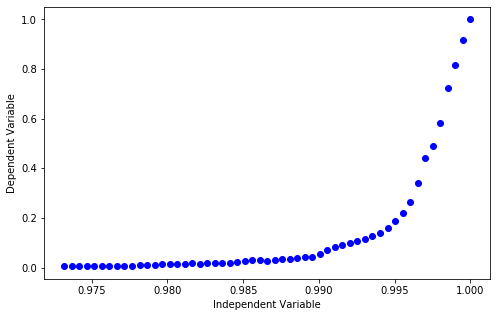

In [5]:
#Check Plot
plt.figure(figsize=(8,5))
plt.plot(xdata,ydata,'bo')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

Melihat kecenderungan dari plot yang telah dibuat, fungsi logistic/sigmoid merupakan pendekatan yang bagus sebab melihat dari data yang menunjukkan slow growth pada awalnya, kemudian meningkat pada pertengahan dan akan kembali turun.

## Menentukan dan Mengevaluasi Model

In [28]:
#Mendefinisikan Fungsi Sigmoid
def sigmoid (x,Beta_1, Beta_2):
    y = 1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

In [29]:
#Fitting Data
from scipy.optimize import curve_fit
popt,pcov =curve_fit(sigmoid,xdata,ydata)
print ("Nilai Beta 1 : ",popt[0], "Nilai Beta 2 :",popt[1])

Nilai Beta 1 :  690.4517109968472 Nilai Beta 2 : 0.9972071272536187


In [30]:
#Split The Dataset
msk = np.random.rand(len(df))<0.8
train_x=xdata[msk]
train_y=ydata[msk]
test_x=xdata[~msk]
test_y=ydata[~msk]

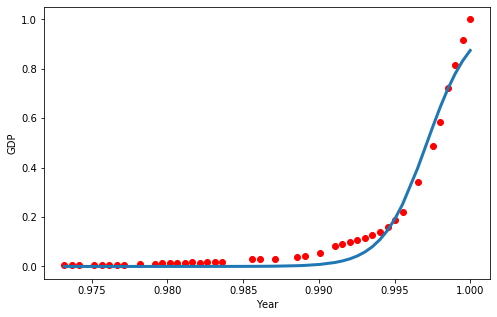

In [31]:
#Predict
popt,pcov=curve_fit(sigmoid,train_x,train_y)

y_pred= sigmoid(train_x,*popt)
plt.figure(figsize = (8,5))
plt.plot(train_x,train_y,'ro', label = 'data')
plt.plot(train_x,y_pred, linewidth=3.0, label='fit')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

In [32]:
#Model Evaluation
from sklearn.metrics import r2_score
y_hat = sigmoid(test_x,*popt)

print("MAE : %.2f" %np.mean(np.absolute(y_hat-test_y)))
print("MSE : %.2f" %np.mean(y_hat - test_y)**2)
print("R2-Score", r2_score(y_hat,test_y))

MAE : 0.03
MSE : 0.00
R2-Score 0.9503295488134312
